# Assignment 1

### Step 1. Download dataset and import necessary libraries.

In [1]:
import pandas as pd
import numpy as np

### Step 2. Assign variable to it.

In [2]:
telco = pd.read_csv('Telco-Customer-Churn.csv')
telco.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### Step 3. Basic info about the DataFrame.

In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### Step 4. Basic statistics about the dataset's numeric columns.

In [4]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Step 5. Display first three observations and last three observations.

In [5]:
telco.iloc[0:3]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [6]:
telco.loc[7040:7043]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Step 6. Calculate the percentage of churn by Phone Service.

In [7]:
ps_churn = telco.groupby(['PhoneService','Churn']).Churn.count()
churn_per_ps = telco.groupby(['PhoneService']).PhoneService.count()
ps_churn/churn_per_ps*100

PhoneService  Churn
No            No       75.073314
              Yes      24.926686
Yes           No       73.290363
              Yes      26.709637
dtype: float64

### Step 7. Calculate the percentage of churn by Internet Service.

In [8]:
is_churn = telco.groupby(['InternetService','Churn']).Churn.count()
churn_per_is = telco.groupby(['InternetService']).InternetService.count()
is_churn/churn_per_is*100

InternetService  Churn
DSL              No       81.040892
                 Yes      18.959108
Fiber optic      No       58.107235
                 Yes      41.892765
No               No       92.595020
                 Yes       7.404980
dtype: float64

Compare to DSL, the churn rate of Fiber optic subscriber is higher which is 41.89%.

### Step 8. Discover mean monthly charges per Internet Service.

In [9]:
telco.groupby('InternetService').MonthlyCharges.mean()

InternetService
DSL            58.102169
Fiber optic    91.500129
No             21.079194
Name: MonthlyCharges, dtype: float64

The mean monthly charges of Fiber optic which is the highest indicates the high churn rate of Fiber optic in Step 7.

### Step 9. Discover number of female customer who monthly charges more than 90.

In [10]:
a = telco[(telco.MonthlyCharges > 90) & (telco.gender == 'Female')]
len(a)

860

### Step 10. Calculate max and min of monthly charges by Internet Service.

In [11]:
telco.groupby('InternetService').MonthlyCharges.agg(['min', 'max'])

,min,max
InternetService,,
DSL,23.45,94.80
Fiber optic,67.75,118.75
No,18.25,26.90


### Step 11. Calculate churn of customer by Contract types.

In [12]:
telco.groupby(['Contract','Churn']).size()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
dtype: int64

Customers signed up Month-to-month Contract have high tendency to churn compare to customers signed up for one year and  two years Contract. 

# Assignment 1: Part TWO (scikit-learn)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

sns.set()

In [14]:
print(telco.keys())
print(telco.shape)
print(telco.InternetService.shape)
print(telco.Contract.tail())
print(telco.MonthlyCharges.head())

Index([u'customerID', u'gender', u'SeniorCitizen', u'Partner', u'Dependents',
       u'tenure', u'PhoneService', u'MultipleLines', u'InternetService',
       u'OnlineSecurity', u'OnlineBackup', u'DeviceProtection', u'TechSupport',
       u'StreamingTV', u'StreamingMovies', u'Contract', u'PaperlessBilling',
       u'PaymentMethod', u'MonthlyCharges', u'TotalCharges', u'Churn'],
      dtype='object')
(7043, 21)
(7043L,)
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, dtype: object
0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64


## Find Missing Value

In [15]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print "Missing values per column:"
print telco.apply(num_missing, axis=0) #axis=0 defines that function is to be applied on each column

#Applying per row:
print "\nMissing values per row:"
print telco.apply(num_missing, axis=1).head() #axis=1 defines that function is to be applied on each row

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


### *Questions:* What is the relationship of tenure and TotalCharge? Is tenure and TotalCharges affect Churn? What is the average TotalCharges by Internet Sevices?

In [16]:
#Change TotalCharges data type
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'].str.replace(' ',''), errors='force')

#Input missing values
from scipy.stats import mode
mode(telco['TotalCharges'])
telco['TotalCharges'].fillna(mode(telco['TotalCharges']).mode[0], inplace=True)

telco['TotalCharges'].dtypes

dtype('float64')

## Visualizing Data: Histogram

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BDE0390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C0E5DD8>], dtype=object)

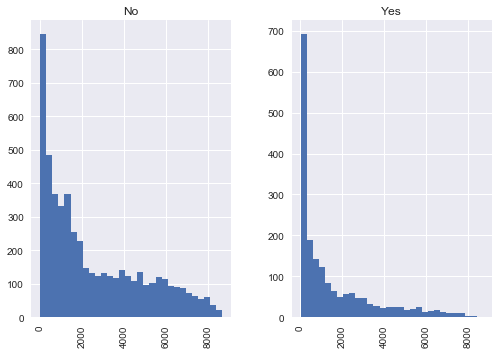

In [17]:
telco.hist(column="TotalCharges",by="Churn",bins=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CF9A5C0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CE6F9B0>], dtype=object)

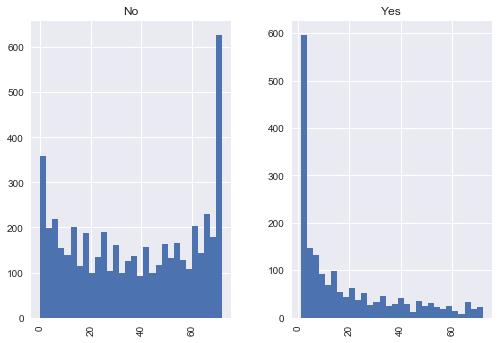

In [18]:
telco.hist(column="tenure",by="Churn",bins=30)

## Visualizing Data: Boxplot

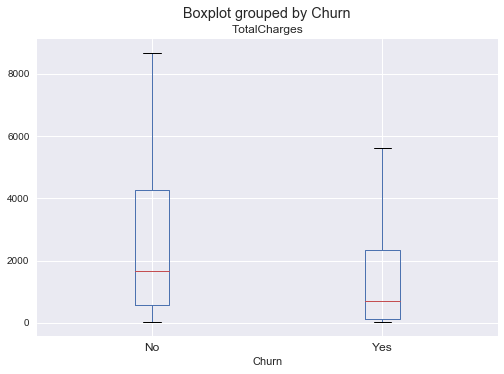

In [19]:
telco.boxplot(column="TotalCharges",by="Churn")

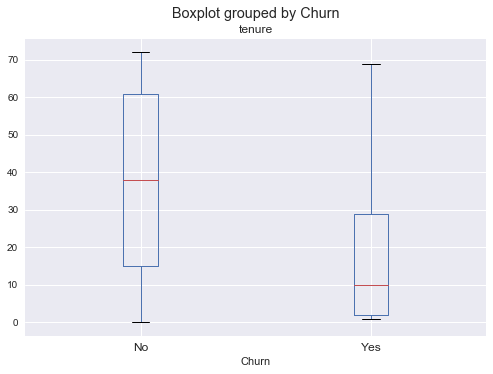

In [20]:
telco.boxplot(column="tenure",by="Churn")

## Coding Nominal Data

In [21]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Coding Churn as Y=1, N=0:
print 'Before Coding:'
print pd.value_counts(telco["Churn"])
telco["Churn_Coded"] = coding(telco["Churn"], {'No':0,'Yes':1})
print '\nAfter Coding:'
print pd.value_counts(telco["Churn_Coded"])

Before Coding:
No     5174
Yes    1869
Name: Churn, dtype: int64

After Coding:
0    5174
1    1869
Name: Churn_Coded, dtype: int64


## Visualizing Data: Bar Chart

Before Coding:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

After Coding:
2    3096
1    2421
0    1526
Name: InternetService_Coded, dtype: int64


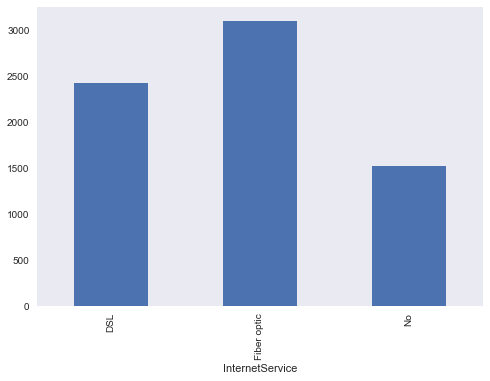

In [22]:
#Coding Churn as Y=1, N=0:
print 'Before Coding:'
print pd.value_counts(telco["InternetService"])
telco["InternetService_Coded"] = coding(telco["InternetService"], {'No':0,'DSL':1,'Fiber optic':2})
print '\nAfter Coding:'
print pd.value_counts(telco["InternetService_Coded"])

telco['InternetService'].unique()
class_group = telco.groupby('InternetService').apply(lambda x: len(x))
class_group

# Plot bar chart based on Class Label
class_group.plot(kind='bar', grid=False)

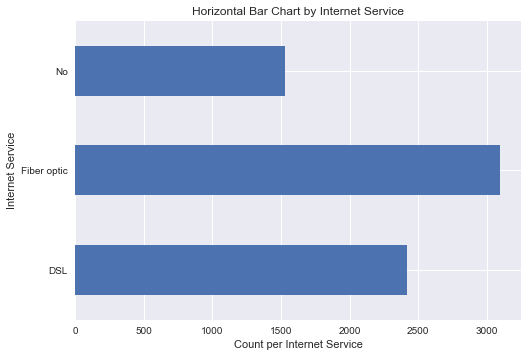

In [23]:
class_group.plot(kind='barh', grid=True)
plt.ylabel('Internet Service')
plt.xlabel('Count per Internet Service')
plt.title('Horizontal Bar Chart by Internet Service')

## Pivot table

In [24]:
#Determine pivot table
impute_grps = telco.pivot_table(values=["TotalCharges"], index=["gender","InternetService","Churn"], aggfunc=np.mean)
print impute_grps

                              TotalCharges
gender InternetService Churn              
Female DSL             No      2430.691899
                       Yes      802.209589
       Fiber optic     No      4217.223172
                       Yes     1758.642846
       No              No       716.242547
                       Yes      172.446429
Male   DSL             No      2423.116717
                       Yes      768.052500
       Fiber optic     No      4056.323187
                       Yes     2078.228436
       No              No       687.921814
                       Yes      175.367544


From the bar charts and pivot table, Fiber Optic is the internet service that has high average TotalCharges which indicates it contributes higher income for the Telco company.

## Linear Regression

In [25]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

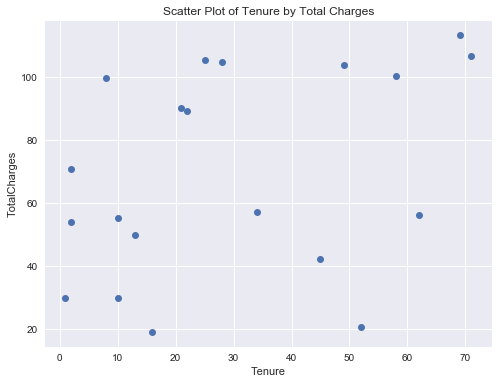

In [26]:
X = telco.tenure[0:20]
Y = telco.MonthlyCharges[0:20]
plt.ylabel('TotalCharges')
plt.xlabel('Tenure')
plt.title('Scatter Plot of Tenure by Total Charges')
plt.plot(X, Y, 'o');

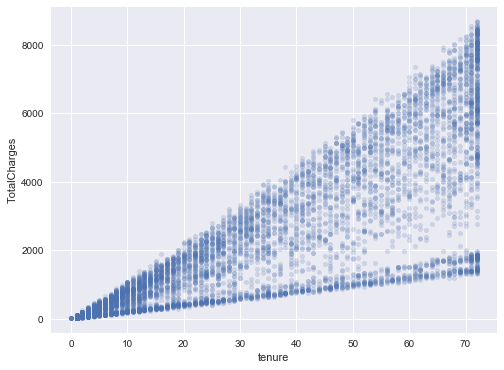

In [27]:
# Pandas scatter plot
telco.plot(kind='scatter', x='tenure', y='TotalCharges', alpha=0.2)

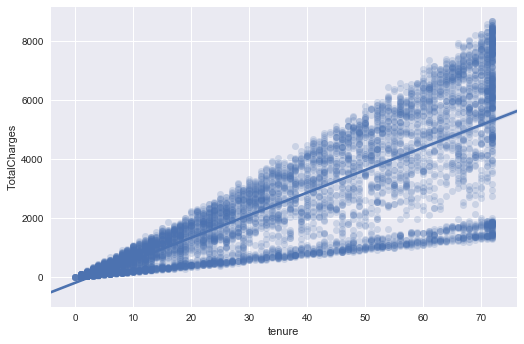

In [28]:
# Seaborn scatter plot with regression line
sns.lmplot(x='tenure', y='TotalCharges', data=telco, aspect=1.5, scatter_kws={'alpha':0.2})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E1A43C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EBDCBE0>]], dtype=object)

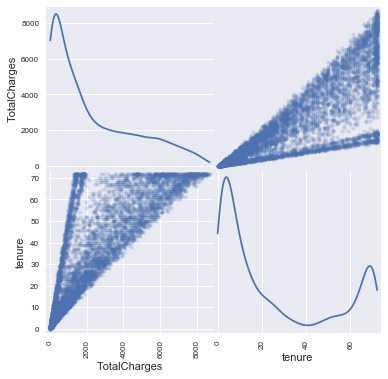

In [29]:
churn = telco.loc[:,['TotalCharges', 'tenure']] 
from pandas.tools.plotting import scatter_matrix
scatter_matrix(churn, alpha=0.2, figsize=(6, 6), diagonal='kde')

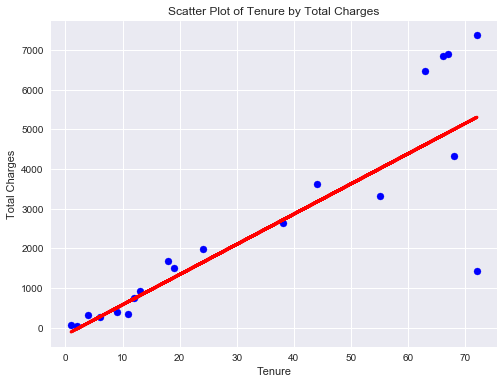

In [30]:
#Linear Model 1
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

churn_X = churn.tenure[:, np.newaxis]

churn_X_train = churn_X[:-20] #training set
churn_X_test = churn_X[-20:]  #testing set

churn_y_train = churn.TotalCharges[:-20]  #training set
churn_y_test = churn.TotalCharges[-20:]   #testing set

regr = linear_model.LinearRegression()
#Fit into model
regr.fit(churn_X_train, churn_y_train)
#Scatter plot
plt.scatter(churn_X_test, churn_y_test, color='blue')
plt.plot(churn_X_test, regr.predict(churn_X_test), color='red', linewidth=3)
plt.ylabel('Total Charges')
plt.xlabel('Tenure')
plt.title('Scatter Plot of Tenure by Total Charges')
plt.show()

The scatter plots show positive linear trend. TotalCharges increase as the tenure increase. Both associate to each other.

In [31]:
# print the coefficients
print ('Intercept:')
print regr.intercept_
print ('Coefficients:')
print regr.coef_
print ('Mean squared error:')
print "%.3f" % np.mean((regr.predict(churn_X_test) - churn_y_test) ** 2)
print ('Variance score:')
print "%.3f" % regr.score(churn_X_test, churn_y_test)

Intercept:
-188.748589946
Coefficients:
[ 76.23770069]
Mean squared error:
1621486.318
Variance score:
0.735


In [32]:
# manually calculate the prediction
regr.intercept_ + regr.coef_*5

array([ 192.43991351])

In [33]:
# use the predict method
regr.predict(5)

array([ 192.43991351])

In [34]:
#Linear model 2
# create X and y
feature_cols = ['tenure']
X = telco[feature_cols]
y = telco.TotalCharges

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

-188.632568112
[ 76.25303775]


The coefficient indicates that the TotalCharges is expected to increase by average of 76.25 for every increase of month in tenure.

## Visualizing data

In [35]:
# explore more features
feature_cols = ['tenure', 'InternetService_Coded', 'MonthlyCharges', 'Churn_Coded']

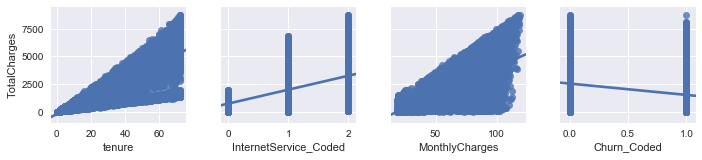

In [36]:
# multiple scatter plots in Seaborn
sns.pairplot(telco, x_vars=feature_cols, y_vars='TotalCharges', kind='reg')

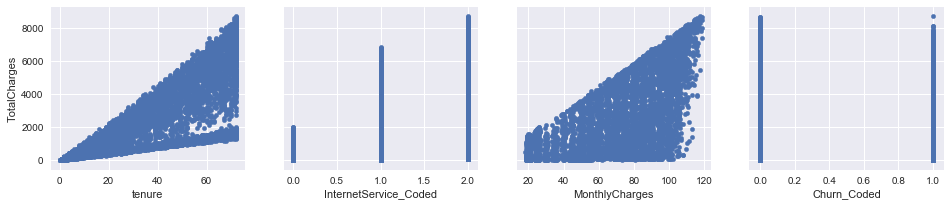

In [37]:
# multiple scatter plots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    telco.plot(kind='scatter', x=feature, y='TotalCharges', ax=axs[index], figsize=(16, 3))

In [38]:
# pair the feature names with the coefficients
zip(feature_cols, regr.coef_)

[('tenure', 76.237700690602793)]

## Crosstab

In [39]:
pd.crosstab(telco["Churn"],telco["InternetService"],margins=True)

InternetService,DSL,Fiber optic,No,All
Churn,,,,
No,1962,1799,1413,5174
Yes,459,1297,113,1869
All,2421,3096,1526,7043


In [40]:
pd.crosstab(telco["Churn"],telco["PaperlessBilling"],margins=True)

PaperlessBilling,No,Yes,All
Churn,,,
No,2403,2771,5174
Yes,469,1400,1869
All,2872,4171,7043


In [41]:
pd.crosstab(telco["Churn"],telco["PaymentMethod"],margins=True)

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
Churn,,,,,
No,1286,1290,1294,1304,5174
Yes,258,232,1071,308,1869
All,1544,1522,2365,1612,7043


In [42]:
#remove the SeniorCitizen column
telco.drop('SeniorCitizen', axis=1, inplace=True)

In [43]:
telco.corr()

,tenure,MonthlyCharges,TotalCharges,Churn_Coded,InternetService_Coded
tenure,1.000000,0.247900,0.826172,-0.352229,0.033230
MonthlyCharges,0.247900,1.000000,0.651172,0.193356,0.905491
TotalCharges,0.826172,0.651172,1.000000,-0.198335,0.428955
Churn_Coded,-0.352229,0.193356,-0.198335,1.000000,0.316846
InternetService_Coded,0.033230,0.905491,0.428955,0.316846,1.000000


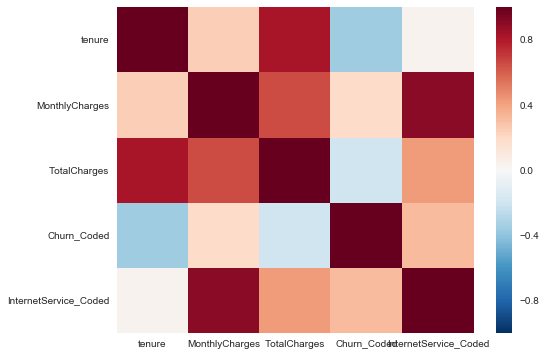

In [44]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(telco.corr())

## Label Encoder

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

cols_to_retain = ['Contract','InternetService','tenure','TotalCharges','Churn']

X_feature = telco[cols_to_retain]
X_dict = X_feature.T.to_dict().values()

# turn list of dicts into a numpy array
vect = DictVectorizer(sparse=False)
X_vector = vect.fit_transform(X_dict)

# print the features
# vect.get_feature_names()

# train set
X_Train = X_vector[:-20]
# test set
X_Test = X_vector[-20:]

# Used to vectorize the class label
le = LabelEncoder()
y_train = le.fit_transform(telco['Contract'][:-20])

## Decision Tree Classification

In [46]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_Train,y_train)

In [47]:
# Predict the test data, not seen earlier
le.inverse_transform(clf.predict(X_Test))

array(['Month-to-month', 'Month-to-month', 'Month-to-month',
       'Month-to-month', 'Month-to-month', 'Two year', 'Month-to-month',
       'Month-to-month', 'One year', 'Month-to-month', 'Month-to-month',
       'Month-to-month', 'Month-to-month', 'One year', 'Two year',
       'One year', 'One year', 'Month-to-month', 'Month-to-month',
       'Two year'], dtype=object)

In [48]:
# Prediction with the same training set
Train_predict = clf.predict(X_Train)

In [49]:
# The model predicted the training set correctly
(Train_predict == y_train).all()

True

In [50]:
# Metrics related to the DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

print 'Accuracy is:', accuracy_score(y_train, Train_predict)
print classification_report(y_train, Train_predict)

Accuracy is: 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3862
          1       1.00      1.00      1.00      1469
          2       1.00      1.00      1.00      1692

avg / total       1.00      1.00      1.00      7023



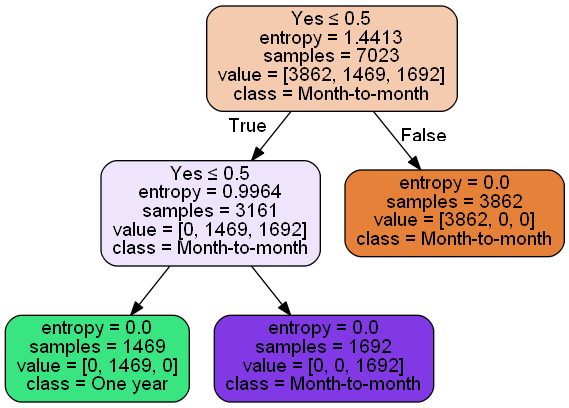

In [51]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=telco.Churn,class_names=telco.Contract,filled=True, rounded=True,special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

From the decision tree, customer with month-to-month contract has higher churn rate.